## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 📊
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

In [154]:
import time
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, mean_squared_error, r2_score, mean_absolute_error

In [155]:
pd.set_option('display.max_columns', None)

In [156]:
dataset = pd.read_csv('./datos.csv', encoding='UTF-8')
dataset.info()

<ipython-input-156-894a1e58243d>:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./datos.csv', encoding='UTF-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CICLO              176 non-null    object 
 1   EVENTO             176 non-null    object 
 2   LOTE               176 non-null    object 
 3   SUP                176 non-null    float64
 4   pp Nov             176 non-null    object 
 5   pp Dic             176 non-null    object 
 6   pp Ene             176 non-null    object 
 7   IPC                176 non-null    object 
 8   EROSION POTENCIAL  176 non-null    object 
 9   EVI 1 Nov media    176 non-null    float64
 10  EVI 1 Nov min      176 non-null    float64
 11  EVI 1 Nov max      176 non-null    float64
 12  EVI 17 Nov media   176 non-null    float64
 13  EVI 17 Nov min     176 non-null    float64
 14  EVI 17 Nov max     176 non-null    float64
 15  EVI 3 Dic media    176 non-null    float64
 16  EVI 3 Dic min     



* PP => precipitacion
* SUP => tamaño del lote
* EVI => indice geoespacial
* H => Humedad
* T => Temperatura



In [157]:
# Corrijo tipos de datos
columnas = ('H_Nov', 'H_Dic', 'H_Ene', 'IPC', 'pp Nov', 'pp Dic', 'pp Ene')
for col in columnas:
  dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [158]:
dataset.head(5)

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene
0,2001/02,Neutro,TEMPEL N2,64.8,353.0,140.0,156.0,52.0,moderadamente susceptible,0.21,0.20,0.24,0.47,0.44,0.49,0.78,0.75,0.81,0.76,0.68,0.77,0.62,0.58,0.64,0.62,0.61,0.62,0.49,0.47,0.51,6675.0,1458.0,677.0,1064.0,20.4,0.0,22.9,0.0,24.5,6.0
1,2001/02,Neutro,3D,118.4,353.0,140.0,156.0,34.0,practicamente no susceptible,0.51,0.46,0.62,0.70,0.64,0.75,0.76,0.65,0.80,0.64,0.62,0.69,0.55,0.49,0.59,0.38,0.30,0.58,0.19,0.16,0.30,8357.0,1463.0,696.0,1111.0,20.4,0.0,22.9,0.0,24.5,6.0
2,2001/02,Neutro,6NORTE,143.6,353.0,140.0,156.0,32.0,moderadamente susceptible,0.48,0.46,0.51,0.68,0.55,0.76,0.77,0.71,0.83,0.64,0.54,0.70,0.53,0.49,0.56,0.31,0.29,0.34,0.19,0.16,0.33,7296.0,1459.0,689.0,1093.0,20.4,0.0,22.9,0.0,24.5,6.0
3,2001/02,Neutro,BUEYES NORTE,143.1,358.0,136.0,120.0,32.0,moderadamente susceptible,0.33,0.25,0.48,0.38,0.20,0.63,0.46,0.23,0.64,0.52,0.44,0.56,0.57,0.45,0.71,0.59,0.45,0.76,0.47,0.32,0.60,4668.0,1455.0,689.0,1092.0,20.4,0.0,22.9,0.0,24.5,6.0
4,2001/02,Neutro,4,69.4,337.0,153.0,170.0,50.0,moderadamente susceptible,0.37,0.24,0.43,0.56,0.44,0.66,0.63,0.51,0.72,0.59,0.51,0.65,0.55,0.49,0.58,0.51,0.48,0.53,0.30,0.29,0.34,5848.0,1483.0,759.0,1239.0,20.4,0.0,22.9,0.0,24.5,6.0


In [159]:
duplicadas = dataset.duplicated()
duplicadas.all()

False

In [160]:
dataset.dropna(inplace=True)

In [161]:
#dataset.drop(columns=['Unnamed: 34'], inplace=True)

In [162]:
dataset.describe()

,SUP,pp Nov,pp Dic,pp Ene,IPC,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,85.300000,222.424419,252.436047,241.250000,45.895349,0.367326,0.316337,0.426163,0.528314,0.429302,0.604826,0.625988,0.550814,0.690756,0.596337,0.520814,0.651628,0.547849,0.484128,0.602907,0.455116,0.396453,0.523081,0.304302,0.255756,0.382558,6985.290698,977.337209,948.837209,1136.953488,21.299419,1.081395,23.481977,2.598837,25.280814,6.244186
std,46.898235,99.624383,176.875353,109.025247,13.012840,0.105613,0.098188,0.120575,0.128669,0.129414,0.141121,0.087082,0.095547,0.096446,0.089508,0.108128,0.090636,0.104577,0.109501,0.110203,0.116632,0.115747,0.123223,0.080779,0.076150,0.103485,2485.981700,325.418439,488.379259,376.022782,1.091461,1.986593,0.980494,3.033266,0.636909,3.915589
min,8.500000,50.000000,8.000000,23.000000,13.000000,0.170000,0.170000,0.180000,0.190000,0.000000,0.230000,0.340000,0.230000,0.340000,0.340000,0.240000,0.380000,0.220000,0.190000,0.250000,0.180000,0.150000,0.220000,0.150000,0.130000,0.170000,390.000000,78.000000,240.000000,503.000000,20.300000,0.000000,21.700000,0.000000,24.200000,0.000000
25%,53.600000,160.000000,83.000000,155.250000,35.000000,0.290000,0.240000,0.340000,0.457500,0.330000,0.527500,0.580000,0.497500,0.637500,0.550000,0.440000,0.610000,0.500000,0.417500,0.557500,0.380000,0.320000,0.440000,0.250000,0.200000,0.307500,5591.250000,783.000000,494.000000,792.750000,20.500000,0.000000,22.700000,0.000000,25.100000,3.000000
50%,78.150000,210.000000,256.500000,228.000000,46.500000,0.340000,0.300000,0.410000,0.555000,0.440000,0.640000,0.630000,0.560000,0.695000,0.610000,0.530000,0.660000,0.570000,0.510000,0.620000,0.470000,0.400000,0.530000,0.300000,0.250000,0.370000,7226.000000,965.000000,1042.000000,1075.000000,20.900000,0.000000,23.550000,3.000000,25.200000,5.000000
75%,110.650000,315.000000,383.000000,305.000000,50.000000,0.422500,0.362500,0.500000,0.630000,0.512500,0.710000,0.682500,0.620000,0.752500,0.650000,0.600000,0.710000,0.620000,0.570000,0.670000,0.540000,0.470000,0.610000,0.352500,0.302500,0.450000,8678.750000,1178.000000,1370.750000,1454.500000,21.800000,1.000000,24.100000,3.000000,25.800000,9.000000
max,264.100000,432.000000,706.000000,524.000000,73.000000,0.670000,0.640000,0.780000,0.750000,0.720000,0.830000,0.900000,0.860000,0.940000,0.810000,0.790000,0.850000,0.770000,0.680000,0.820000,0.660000,0.640000,0.840000,0.530000,0.480000,0.730000,13315.000000,1558.000000,1751.000000,1876.000000,24.100000,7.000000,26.800000,17.000000,26.500000,13.000000


In [163]:
dataset.describe(include='O')

,CICLO,EVENTO,LOTE,EROSION POTENCIAL
count,172,172,172,172
unique,16,3,111,4
top,2005/06,Niña,BUEYES NORTE,moderadamente susceptible
freq,20,77,4,80


In [164]:
dataset['EROSION POTENCIAL'].unique()

array(['moderadamente susceptible', 'practicamente no susceptible',
       'levemente susceptible', 'altamente susceptible'], dtype=object)

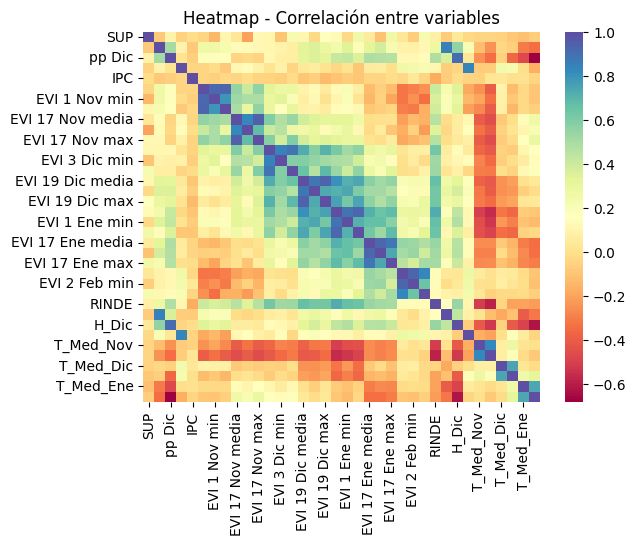

In [165]:
sns.heatmap(dataset.corr(numeric_only=True, method='pearson'), cmap='Spectral')
plt.title('Heatmap - Correlación entre variables')
plt.show()

In [166]:
df_categorico = dataset.select_dtypes(include=['object'])
pd.Series(df_categorico.columns)

0                CICLO
1               EVENTO
2                 LOTE
3    EROSION POTENCIAL
dtype: object

In [167]:
df_cuantitativo = dataset.select_dtypes(include=['float'])
pd.Series(df_cuantitativo.columns)

0                  SUP
1               pp Nov
2               pp Dic
3               pp Ene
4                  IPC
5      EVI 1 Nov media
6        EVI 1 Nov min
7        EVI 1 Nov max
8     EVI 17 Nov media
9       EVI 17 Nov min
10      EVI 17 Nov max
11     EVI 3 Dic media
12       EVI 3 Dic min
13       EVI 3 Dic max
14    EVI 19 Dic media
15      EVI 19 Dic min
16      EVI 19 Dic max
17     EVI 1 Ene media
18       EVI 1 Ene min
19       EVI 1 Ene max
20    EVI 17 Ene media
21      EVI 17 Ene min
22      EVI 17 Ene max
23     EVI 2 Feb media
24       EVI 2 Feb min
25       EVI 2 Feb max
26               RINDE
27               H_Nov
28               H_Dic
29               H_Ene
30           T_Med_Nov
31          T > 33 Nov
32           T_Med_Dic
33          T > 33 Dic
34           T_Med_Ene
35          T > 33 Ene
dtype: object

In [168]:
def chi_cuadrado(df):
  comb = list(itertools.combinations(df.columns, 2))

  alpha = 0.05

  resultado = list()
  for c in comb:
      contingency_table = pd.crosstab(df[c[0]], df[c[1]])
      stat, p_value, dof, expected_freq = ss.chi2_contingency(contingency_table)

      resultado.append({
          'Variable_1': c[0],
          'Variable_2': c[1],
          'p_value': p_value,
          'Independiente': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado[df_resultado['Independiente'] == False]

In [169]:
chi_cuadrado(df_categorico)

,Variable_1,Variable_2,p_value,Independiente
1,CICLO,LOTE,0.861317,False
2,CICLO,EROSION POTENCIAL,0.161349,False
3,EVENTO,LOTE,0.575379,False
4,EVENTO,EROSION POTENCIAL,0.102662,False


In [170]:
def spearman(cuantitativo, categorico):
  comb = list(itertools.product(categorico.columns, cuantitativo.columns))

  alpha = 0.05

  resultado = list()
  for c in comb:
      spearman_corr, p_value = ss.spearmanr(categorico[c[0]], cuantitativo[c[1]])
      resultado.append({
          'Variable_categorica': c[0],
          'Variable_cuantitativa': c[1],
          'Correlacion_Spearman': spearman_corr,
          'p_value': p_value,
          'Independiente': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  filtro = ((df_resultado['Independiente'] == False) & (~pd.isna(df_resultado['Correlacion_Spearman'])))

  return df_resultado[filtro]

In [204]:
spearman(df_cuantitativo, df_categorico)

,Variable_categorica,Variable_cuantitativa,Correlacion_Spearman,p_value,Independiente
0,CICLO,SUP,-0.075709,0.323598,False
2,CICLO,pp Dic,0.089997,0.240365,False
4,CICLO,IPC,0.008408,0.912833,False
5,CICLO,EVI 1 Nov media,0.144258,0.059024,False
6,CICLO,EVI 1 Nov min,0.148509,0.051863,False
...,...,...,...,...,...
139,EROSION POTENCIAL,T > 33 Nov,-0.110215,0.150066,False
140,EROSION POTENCIAL,T_Med_Dic,0.093727,0.221347,False
141,EROSION POTENCIAL,T > 33 Dic,-0.037466,0.625586,False
142,EROSION POTENCIAL,T_Med_Ene,-0.145341,0.057126,False


In [172]:
def display_qqplots(df, filas, columnas):
    fig, axs = plt.subplots(filas, columnas, figsize=(20, 4))
    for i, col in enumerate(df.columns):
        ax = axs[i // columnas, i % columnas]
        ss.probplot(df[col], dist='norm', plot=ax)
        ax.set_title(col)
        ax.set_xlabel('Cuantiles')
        ax.set_ylabel('Valores')

    plt.tight_layout()
    plt.show()

In [206]:
# display_qqplots(df_cuantitativo, 5, 5)

In [174]:
def shapiro_wilk_test(df):
  alpha = 0.05

  resultado = list()
  for col in df.columns:
      stat, p_value = ss.shapiro(df[col])

      resultado.append({
          'Variable': col,
          'p_value': p_value,
          'Normalidad': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado

In [175]:
shapiro_wilk_test(df_cuantitativo)

,Variable,p_value,Normalidad
0,SUP,1.092557e-07,True
1,pp Nov,1.061661e-04,True
2,pp Dic,5.674821e-09,True
3,pp Ene,1.143011e-03,True
4,IPC,2.348935e-08,True
5,EVI 1 Nov media,1.064805e-05,True
6,EVI 1 Nov min,2.539938e-07,True
7,EVI 1 Nov max,4.825420e-04,True
8,EVI 17 Nov media,5.086604e-06,True
9,EVI 17 Nov min,2.546524e-02,True


In [176]:
def kolmorogov_smirnow_test(df):
  alpha = 0.05

  resultado = []
  for col in df.columns:
      stat, p_value = ss.kstest(df[col], 'norm', N=df.shape[0])
      resultado.append({
          'Variable': col,
          'p_value': p_value,
          'Normalidad': p_value < alpha
      })

  df_resultado = pd.DataFrame(resultado)

  return df_resultado

In [177]:
kolmorogov_smirnow_test(df_cuantitativo)

,Variable,p_value,Normalidad
0,SUP,0.000000e+00,True
1,pp Nov,0.000000e+00,True
2,pp Dic,0.000000e+00,True
3,pp Ene,0.000000e+00,True
4,IPC,0.000000e+00,True
5,EVI 1 Nov media,2.831474e-53,True
6,EVI 1 Nov min,7.351606e-53,True
7,EVI 1 Nov max,4.461499e-54,True
8,EVI 17 Nov media,1.052169e-55,True
9,EVI 17 Nov min,4.258409e-52,True


In [178]:
# Variable que se utilizará en los modelos
target = df_cuantitativo['RINDE']

In [179]:
# scaler = StandardScaler()
# df_cuantitativo = pd.DataFrame(
#     scaler.fit_transform(df_cuantitativo),
#     columns=df_cuantitativo.columns
# )

scaler = RobustScaler()
df_cuantitativo = pd.DataFrame(
    scaler.fit_transform(df_cuantitativo),
    columns=df_cuantitativo.columns
)

In [180]:
pca = PCA(whiten=True)
pca.fit(df_cuantitativo)

PCA(whiten=True)

In [181]:
idx_pca = [f"PCA{i}" for i in range(1, df_cuantitativo.shape[1]+1)]

# autovectores
eigvec = pd.DataFrame(
    data=pca.components_,
    columns=df_cuantitativo.columns,
    index=idx_pca
)

In [182]:
eigvec

,SUP,pp Nov,pp Dic,pp Ene,IPC,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,EVI 19 Dic media,EVI 19 Dic min,EVI 19 Dic max,EVI 1 Ene media,EVI 1 Ene min,EVI 1 Ene max,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene
PCA1,-0.029004,-0.079021,-0.092351,-0.012341,0.024254,-0.108775,-0.094927,-0.102033,-0.141796,-0.104174,-0.147928,-0.206850,-0.155340,-0.175909,-0.238579,-0.164243,-0.222847,-0.255923,-0.194378,-0.260487,-0.140860,-0.143758,-0.135194,-0.037241,-0.038748,-0.045789,-0.225270,-0.069155,-0.107394,-0.033843,0.203776,0.556530,0.046398,0.104822,0.022990,0.010137
PCA2,0.052872,0.041514,0.083821,0.019378,-0.017613,-0.263712,-0.262912,-0.229273,-0.198002,-0.175279,-0.195883,-0.023620,-0.034580,-0.008908,0.152129,0.095007,0.178004,0.157571,0.101500,0.184204,0.261058,0.238253,0.240605,0.284561,0.244023,0.235359,0.025883,0.071126,0.027795,0.038958,0.110027,0.340745,-0.057795,-0.067676,-0.131410,-0.115524
PCA3,-0.029378,0.144543,0.209332,-0.022576,0.032471,0.055726,0.045192,0.061027,-0.182304,-0.108454,-0.186148,-0.304546,-0.226252,-0.313125,-0.200064,-0.085699,-0.219283,-0.047135,0.003916,-0.080257,0.050305,0.081867,0.033685,-0.015445,-0.028316,-0.011828,-0.008200,0.193689,0.233480,-0.015936,-0.126310,-0.347998,-0.040218,-0.248859,-0.348281,-0.269109
PCA4,-0.036559,-0.138041,-0.106637,0.169155,0.059312,-0.237819,-0.235902,-0.202973,-0.067634,-0.011246,-0.068782,-0.116023,-0.079922,-0.134403,-0.105268,-0.083233,-0.111437,-0.030767,-0.041728,-0.034316,0.008177,0.020667,0.002533,0.220274,0.192940,0.163381,-0.086128,-0.252387,-0.092694,0.169164,-0.189691,-0.497487,0.137918,0.266423,0.269764,0.183153
PCA5,-0.186128,0.244627,0.061109,0.290651,-0.057201,0.174835,0.206202,0.104214,0.082242,0.121435,0.055748,0.030456,0.091234,-0.016437,-0.015463,0.025610,-0.045451,-0.104334,0.014256,-0.221527,0.101066,0.163349,0.011328,0.177512,0.176536,0.081308,0.102435,0.222973,0.053806,0.157804,0.118519,0.089325,0.363106,0.499871,-0.134644,-0.128949
PCA6,0.626637,-0.140974,0.051966,-0.041785,0.042507,0.123408,0.001577,0.238089,-0.017627,-0.209976,0.086933,0.050922,-0.166763,0.214283,-0.123789,-0.201374,-0.025348,-0.031303,-0.138092,0.117213,0.038958,-0.066865,0.196578,0.049461,-0.038059,0.172081,0.088497,-0.200088,0.034437,-0.130671,-0.008844,-0.005652,0.283817,0.178840,-0.148136,-0.108814
PCA7,0.067948,0.147986,0.054628,-0.127366,-0.094808,-0.223188,-0.227679,-0.189702,-0.182114,-0.185955,-0.172628,0.043478,0.047842,0.075289,0.156913,0.077134,0.184842,-0.038663,-0.036155,-0.007629,-0.017612,-0.039237,0.028715,-0.355358,-0.370454,-0.252865,-0.029996,0.251773,0.054206,-0.004427,-0.042347,-0.149055,0.183269,0.410051,-0.085036,0.048081
PCA8,-0.215631,-0.150394,0.024466,-0.140357,0.770087,-0.032633,0.008276,-0.068398,-0.016749,0.068100,-0.068090,0.109189,0.142205,0.088099,-0.022151,0.019749,-0.093242,0.018139,0.063056,-0.040773,0.118913,0.164102,0.082263,-0.097284,0.033526,-0.193571,0.008339,-0.208496,0.045270,-0.159713,-0.118240,0.060096,0.164821,0.063807,-0.135252,-0.112348
PCA9,0.230207,-0.031537,0.037010,0.516638,0.100395,-0.191077,-0.166557,-0.193142,0.188172,0.169817,0.139592,0.060371,0.084144,0.030982,0.049940,0.036393,0.016340,-0.072716,-0.088012,-0.079161,-0.091158,-0.152669,-0.047492,-0.116964,-0.088551,-0.070854,0.036794,-0.105088,-0.014230,0.381205,-0.125950,0.059793,-0.110067,-0.146848,-0.366024,-0.204608
PCA10,0.211692,0.311090,-0.062200,-0.010348,0.554781,0.036517,-0.053670,0.083800,0.038953,-0.064970,0.098201,-0.013551,-0.121529,0.061476,0.089091,0.029618,0.103990,-0.090469,-0.080298,-0.041989,-0.102322,-0.145428,-0.043935,0.107519,0.044883,0.227366,-0.243706,0.463536,-0.026320,0.096411,0.073293,-0.066592,-0.169345,-0.016680,0.161601,0.131661


In [183]:
def varianza_explicada(df):
  var_explained = pca.explained_variance_ratio_

  fig, ax = plt.subplots()
  ax.bar(
      x = np.arange(pca.n_components_) + 1,
      height = var_explained
  )

  for x, y in zip(np.arange(len(df.columns)) + 1, var_explained):
      label = round(y, 2)
      ax.annotate(
          label,
          (x,y),
          textcoords="offset points",
          xytext=(0,10),
          ha='center'
      )

  ax.set_xticks(np.arange(pca.n_components_) + 1)
  ax.set_ylim(0,1.1)
  ax.set_title("% de Varianza explicada por cada componente")
  ax.set_xlabel("Componente principal")
  ax.set_ylabel("% var exp")

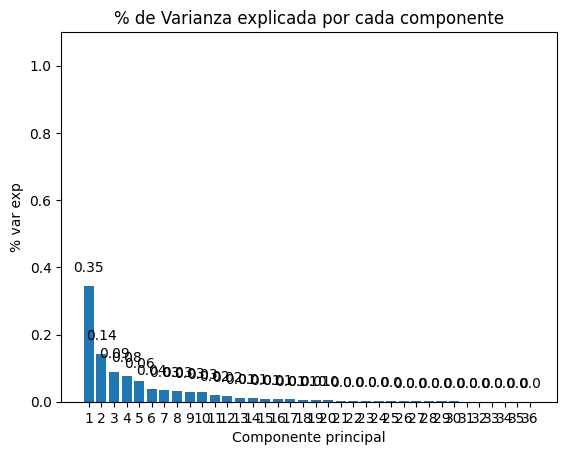

In [184]:
varianza_explicada(df_cuantitativo)

In [185]:
def varianza_explicada_acumulada(df):
  varexpacum = pca.explained_variance_ratio_.cumsum()
  fig, ax = plt.subplots()
  ax.plot(
      np.arange(len(df.columns)) + 1,
      varexpacum,
      marker = 'o'
  )

  for x, y in zip(np.arange(len(df.columns)) + 1, varexpacum):
      label = round(y, 2)
      ax.annotate(
          label,
          (x,y),
          textcoords="offset points",
          xytext=(0,10),
          ha='center'
      )

  ax.set_ylim(0, 1.1)
  ax.set_xticks(np.arange(pca.n_components_) +1)
  ax.set_title("Varianza acumulada explicada")
  ax.set_xlabel("Componentes Principales")
  ax.set_ylabel("% varianza explicada acumulada")
  plt.show()

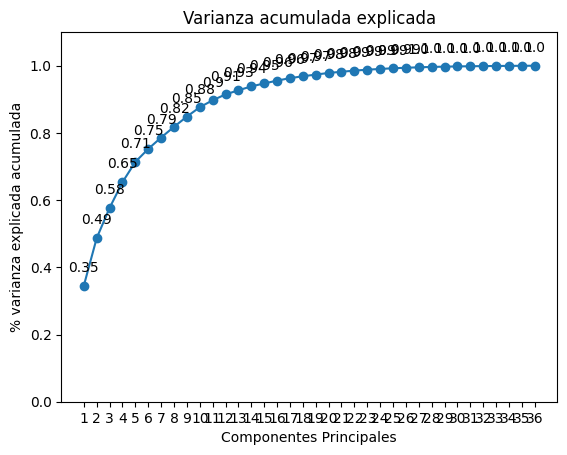

In [186]:
varianza_explicada_acumulada(df_cuantitativo)

In [187]:
# Codifico a df_categorico usando OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse_output=False)
# df_categorico_codificado = df_categorico.copy()

# for col in df_categorico.columns:
#     if df_categorico[col].dtype == 'object':
#         encoded_col = onehot_encoder.fit_transform(df_categorico[[col]])
#         new_columns = [f"{col}_{category}" for category in onehot_encoder.get_feature_names_out([col])]
#         df_categorico_codificado[new_columns] = encoded_col
#         df_categorico_codificado.drop(col, axis=1, inplace=True)

In [188]:
# Codifico a df_categorico usando LabelEncoder
label_encoder = LabelEncoder()
df_categorico_codificado = df_categorico.copy()

for col in df_categorico.columns:
    if df_categorico[col].dtype == 'object':
        df_categorico_codificado[col] = label_encoder.fit_transform(df_categorico[col])

In [189]:
df_codificado = pd.concat([df_cuantitativo, df_categorico_codificado], axis=1)

In [190]:
# def metricas(y_true, y_pred):
#   confusion = confusion_matrix(y_true, y_pred)
#   accuracy = accuracy_score(y_true, y_pred)
#   f1 = f1_score(y_true, y_pred, average='weighted')
#   recall = recall_score(y_true, y_pred, average=None)
#   uar = np.mean(recall)
#   print(confusion)
#   print(f"Accuracy => {accuracy}")
#   print(f"F1 Score => {f1}")
#   print(f"UAR => {uar}")

In [191]:
def metricas_reg(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print("Error Cuadrático Medio (MSE):", mse)
  print("Error Absoluto Medio (MAE):", mae)
  print("Coeficiente de Determinación (R^2):", r2)

In [192]:
X = df_cuantitativo.drop(columns=['RINDE'])
y = target
# y = df_cuantitativo['RINDE']
# x = df_codificado.drop(columns=['RINDE'])
# y = df_codificado['RINDE']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [195]:
# Regresión con SVM
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [196]:
# plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_pred, color='cornflowerblue', label='prediction')
# plt.legend()
# plt.show()

In [197]:
metricas_reg(y_test, y_pred)

Error Cuadrático Medio (MSE): 4181203.4219152564
Error Absoluto Medio (MAE): 1667.3412205421225
Coeficiente de Determinación (R^2): 0.3053681083077877


In [198]:
# Regresion con LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [199]:
metricas_reg(y_test, y_pred)

Error Cuadrático Medio (MSE): 2657397.46479619
Error Absoluto Medio (MAE): 1255.428895935613
Coeficiente de Determinación (R^2): 0.558521114214548


In [200]:
# Regresion con Lasso
reg = Lasso(alpha=1.0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [201]:
metricas_reg(y_test, y_pred)

Error Cuadrático Medio (MSE): 2581000.506515551
Error Absoluto Medio (MAE): 1240.1723550688898
Coeficiente de Determinación (R^2): 0.5712130974296825


In [202]:
# Regresion con Ridge
reg = Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [203]:
metricas_reg(y_test, y_pred)

Error Cuadrático Medio (MSE): 2446159.0865127905
Error Absoluto Medio (MAE): 1209.0974432389273
Coeficiente de Determinación (R^2): 0.5936145788223475
